In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def open_csv(filename):
    df = pd.read_csv(filename, header=None, sep='\t')
    cols = [(line[0], line[1], line[2]) for _, line in df.iterrows()]
    return [c[0] for c in cols], [c[1] for c in cols], [c[2] for c in cols]
    
train_user_ids, train_movie_ids, train_scores = open_csv('./u1.base')
test_user_ids, test_movie_ids, test_scores = open_csv('./u1.test')

train_user_ids = np.array(train_user_ids) - 1 # id1 -> id0
train_movie_ids = np.array(train_movie_ids) - 1
test_user_ids = np.array(test_user_ids) - 1
test_movie_ids = np.array(test_movie_ids) - 1

In [24]:
# 数据处理
u_len = max(np.max(train_user_ids), np.max(test_user_ids)) + 1
i_len = max(np.max(train_movie_ids), np.max(test_movie_ids)) + 1

train_mtx = np.zeros((u_len, i_len), dtype=np.int)
for u, i, c in zip(train_user_ids, train_movie_ids, train_scores):
    train_mtx[u][i] = c
    
test_mtx = np.array(train_mtx, dtype=np.int)
for u, i, c in zip(test_user_ids, test_movie_ids, test_scores):
    test_mtx[u][i] = c

k = 200
P = np.random.random((k, u_len))
Q = np.random.random((k, i_len))

In [25]:
gamma = 0.4
epoches = 200
show_epoch = 1

$$
P = (QQ^T + \gamma E_k)^{-1}QR^T \\
Q = (PP^T + \gamma E_k)^{-1}PR
$$

In [26]:
def calc_loss_acc(P, Q, mtx):
    pred = np.clip(np.round(P.T.dot(Q)).astype(np.int), 1, 5)
    num, loss, acc = 0, 0, 0
    for u in range(mtx.shape[0]):
        for i in range(mtx.shape[1]):
            if mtx[u][i] != 0:
                num += 1
                loss += (pred[u, i] - mtx[u, i]) ** 2 + gamma * ((np.linalg.norm(P[:, u]) ** 2 + np.linalg.norm(Q[:, i]) ** 2))
                acc += 1 if mtx[u][i] == pred[u][i] else 0

    return loss / num, acc / num

calc_loss_acc(P, Q, test_mtx)

(56.84126019967723, 0.21201)

In [27]:
train_losses, train_accs = [], []
test_losses, test_accs = [], []

for epoch in range(epoches):
    P = np.linalg.inv(Q.dot(Q.T) + np.eye(Q.shape[0]) * gamma).dot(Q).dot(train_mtx.T)
    Q = np.linalg.inv(P.dot(P.T) + np.eye(P.shape[0]) * gamma).dot(P).dot(train_mtx)
    
    train_loss, train_acc = calc_loss_acc(P, Q, train_mtx)
    test_loss, test_acc = calc_loss_acc(P, Q, test_mtx)
    
    train_losses.append(train_loss)
    train_accs.append(train_acc)
    test_losses.append(test_loss)
    test_accs.append(test_acc)
    
    if epoch % show_epoch == 0:
        print('Epoch: %d, train_loss: %.4f, test_loss: %.4f, train_acc: %.4f, test_acc: %.4f' % (epoch, train_loss, test_loss, train_acc, test_acc))
    

Epoch: 0, train_loss: 73.6648, test_loss: 74.2927, train_acc: 0.2084, test_acc: 0.1812
Epoch: 1, train_loss: 66.9496, test_loss: 67.8468, train_acc: 0.3547, test_acc: 0.2977
Epoch: 2, train_loss: 59.5415, test_loss: 60.5056, train_acc: 0.4063, test_acc: 0.3390
Epoch: 3, train_loss: 53.6472, test_loss: 54.6516, train_acc: 0.4293, test_acc: 0.3574
Epoch: 4, train_loss: 49.0045, test_loss: 50.0362, train_acc: 0.4413, test_acc: 0.3670
Epoch: 5, train_loss: 45.2737, test_loss: 46.3253, train_acc: 0.4485, test_acc: 0.3728
Epoch: 6, train_loss: 42.2128, test_loss: 43.2808, train_acc: 0.4530, test_acc: 0.3763
Epoch: 7, train_loss: 39.6560, test_loss: 40.7372, train_acc: 0.4563, test_acc: 0.3790
Epoch: 8, train_loss: 37.4916, test_loss: 38.5835, train_acc: 0.4592, test_acc: 0.3813
Epoch: 9, train_loss: 35.6349, test_loss: 36.7363, train_acc: 0.4619, test_acc: 0.3835
Epoch: 10, train_loss: 34.0257, test_loss: 35.1350, train_acc: 0.4631, test_acc: 0.3844
Epoch: 11, train_loss: 32.6197, test_loss:

Epoch: 94, train_loss: 17.8416, test_loss: 18.9910, train_acc: 0.4793, test_acc: 0.3974
Epoch: 95, train_loss: 17.8316, test_loss: 18.9806, train_acc: 0.4794, test_acc: 0.3974
Epoch: 96, train_loss: 17.8215, test_loss: 18.9704, train_acc: 0.4794, test_acc: 0.3975
Epoch: 97, train_loss: 17.8121, test_loss: 18.9606, train_acc: 0.4794, test_acc: 0.3975
Epoch: 98, train_loss: 17.8027, test_loss: 18.9509, train_acc: 0.4794, test_acc: 0.3975
Epoch: 99, train_loss: 17.7938, test_loss: 18.9416, train_acc: 0.4793, test_acc: 0.3974
Epoch: 100, train_loss: 17.7852, test_loss: 18.9327, train_acc: 0.4793, test_acc: 0.3974
Epoch: 101, train_loss: 17.7767, test_loss: 18.9239, train_acc: 0.4792, test_acc: 0.3973
Epoch: 102, train_loss: 17.7684, test_loss: 18.9152, train_acc: 0.4792, test_acc: 0.3973
Epoch: 103, train_loss: 17.7603, test_loss: 18.9068, train_acc: 0.4793, test_acc: 0.3973
Epoch: 104, train_loss: 17.7525, test_loss: 18.8987, train_acc: 0.4793, test_acc: 0.3974
Epoch: 105, train_loss: 17.

Epoch: 187, train_loss: 17.4444, test_loss: 18.5703, train_acc: 0.4812, test_acc: 0.3989
Epoch: 188, train_loss: 17.4425, test_loss: 18.5682, train_acc: 0.4813, test_acc: 0.3990
Epoch: 189, train_loss: 17.4408, test_loss: 18.5664, train_acc: 0.4813, test_acc: 0.3990
Epoch: 190, train_loss: 17.4391, test_loss: 18.5644, train_acc: 0.4812, test_acc: 0.3989
Epoch: 191, train_loss: 17.4372, test_loss: 18.5624, train_acc: 0.4813, test_acc: 0.3990
Epoch: 192, train_loss: 17.4354, test_loss: 18.5605, train_acc: 0.4813, test_acc: 0.3990
Epoch: 193, train_loss: 17.4335, test_loss: 18.5584, train_acc: 0.4814, test_acc: 0.3991
Epoch: 194, train_loss: 17.4317, test_loss: 18.5565, train_acc: 0.4814, test_acc: 0.3991
Epoch: 195, train_loss: 17.4301, test_loss: 18.5547, train_acc: 0.4814, test_acc: 0.3991
Epoch: 196, train_loss: 17.4284, test_loss: 18.5528, train_acc: 0.4814, test_acc: 0.3991
Epoch: 197, train_loss: 17.4266, test_loss: 18.5509, train_acc: 0.4815, test_acc: 0.3991
Epoch: 198, train_los

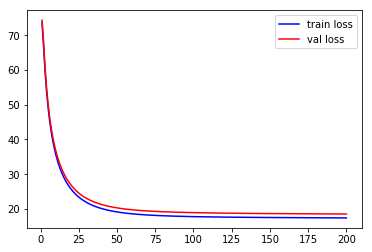

In [28]:
plot_range = range(1, len(train_accs) + 1)

plt.plot(plot_range, train_losses, 'b')
plt.plot(plot_range, test_losses, 'r')
plt.legend(['train loss', 'val loss'])
plt.savefig('./lab_3_2_1.pdf')
plt.show()

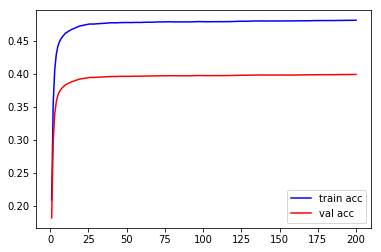

In [29]:
plt.plot(plot_range, train_accs, 'b')
plt.plot(plot_range, test_accs, 'r')
plt.legend(['train acc', 'val acc'])
plt.savefig('./lab_3_2_2.pdf')
plt.show()